In [1]:
import numpy as np
import pandas as pd
import re
import string

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = pd.read_csv("SMSSpamCollection.txt", sep ="\t", names = ["label","message"])

In [3]:
data.head(5)

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
data.shape

(5572, 2)

Removing null values and duplicates

In [5]:
data.isnull().sum()

label      0
message    0
dtype: int64

In [6]:
data.duplicated().sum()

403

In [7]:
data = data.drop_duplicates()

In [8]:
data.duplicated().sum()

0

Exploratory Data Analysis

In [9]:
data['label'].value_counts()

label
ham     4516
spam     653
Name: count, dtype: int64

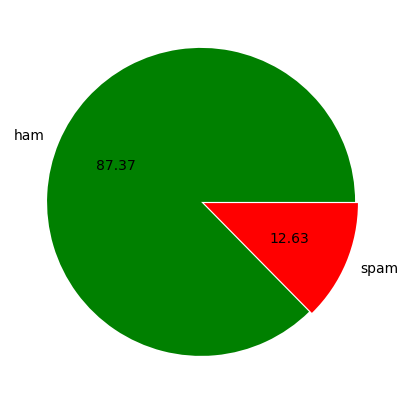

In [10]:
plt.figure(figsize=(9,5))

plt.pie(data['label'].value_counts(), labels = ['ham','spam'], autopct = '%0.2f', colors=['Green', "Red"], explode =[0.01,0.01])
plt.show()

In [11]:
data['message'][0:5]

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: message, dtype: object

In [12]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/syssoni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
#finding no of character
data['num_char'] = data['message'].apply(len)

In [14]:
#finding no of words
data['no_of_words'] = data['message'].apply(lambda x:len(nltk.word_tokenize(x)))

In [15]:
#finding no of sentences
data["no_of_sentences"] = data['message'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [16]:
data.head()

,label,message,num_char,no_of_words,no_of_sentences
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [17]:
print("Spam message description")
data[data['label'] == 'spam'].describe()

Spam message description


,num_char,no_of_words,no_of_sentences
count,653.000000,653.000000,653.000000
mean,137.704441,27.762634,2.986217
std,29.821348,6.993008,1.494815
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


In [18]:
print("Ham message description")
data[data['label'] == 'ham'].describe()

Ham message description


,num_char,no_of_words,no_of_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.905890,17.267715,1.827724
std,56.715046,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='no_of_words', ylabel='Count'>

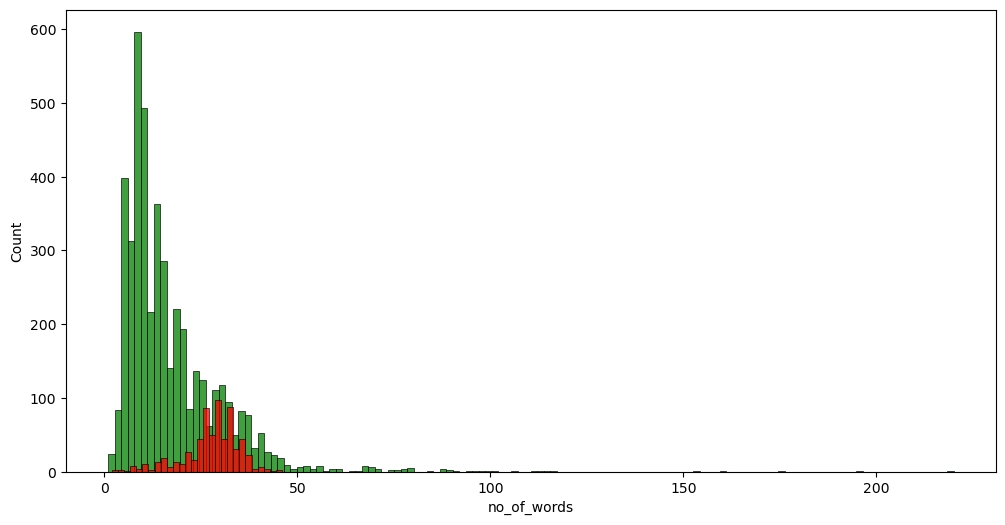

In [19]:
plt.figure(figsize = (12,6))
sns.histplot(data[data['label'] == 'ham']['no_of_words'], color = 'green')
sns.histplot(data[data['label'] == 'spam']['no_of_words'], color = 'red')


Creating Wordcloud

In [20]:
from wordcloud import WordCloud

In [21]:
ham_msg = data[data.label == 'ham'].message
spam_msg = data[data.label == 'spam'].message

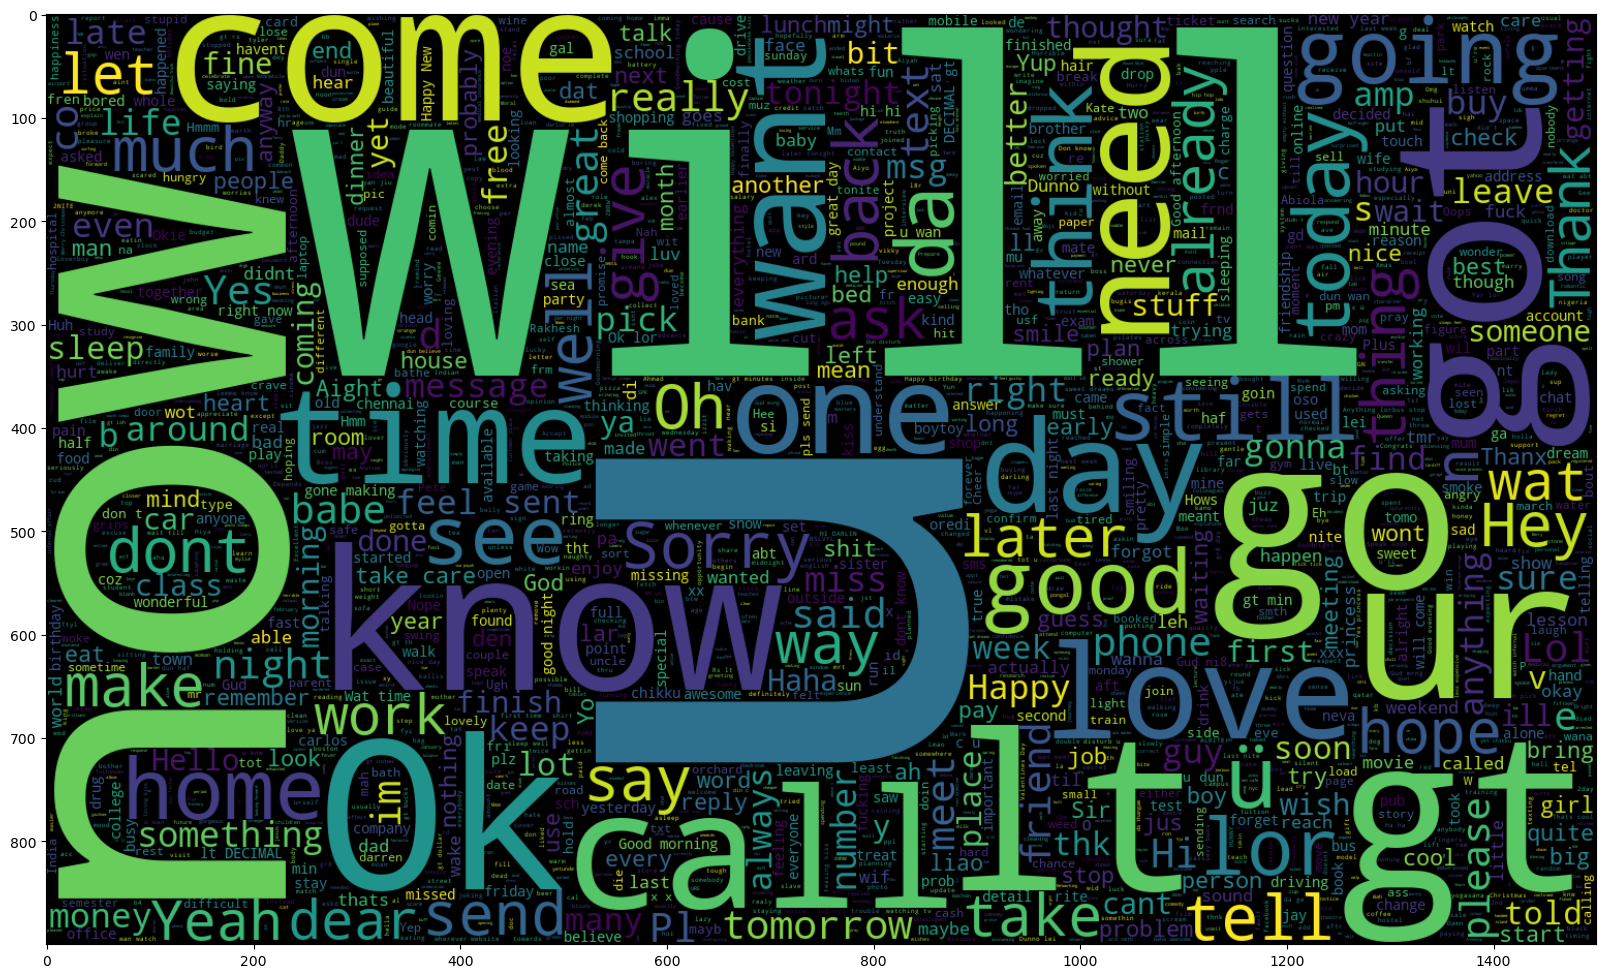

In [22]:
plt.figure(figsize=(20,20))
wc = WordCloud(width=1500, height= 900, max_words= 2500).generate(" ".join(ham_msg))
plt.imshow(wc, interpolation='bilinear')

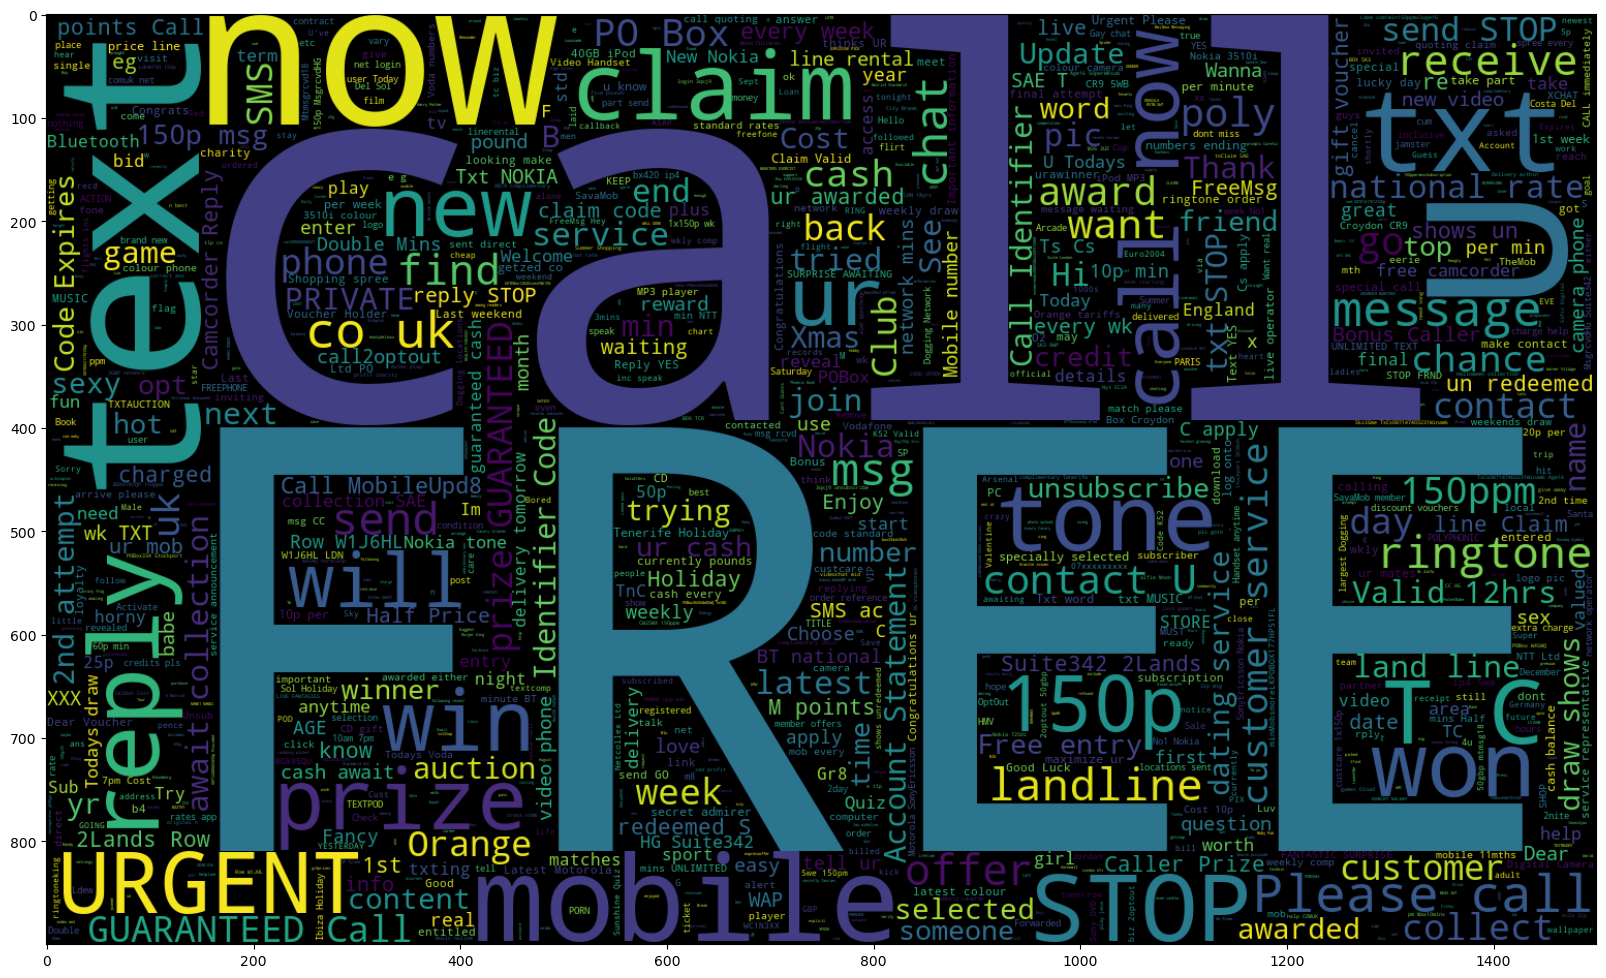

In [23]:
plt.figure(figsize=(20,20))
wc = WordCloud(width = 1500, height = 900, max_words= 2500).generate(" ".join(spam_msg))
plt.imshow(wc, interpolation = 'bilinear')

Remove punctuation , special characters, stopwords

In [24]:
def remove_punc(text):
    trans = str.maketrans('','', string.punctuation)
    return text.translate(trans)

In [25]:
data['message'] = data['message'].apply(remove_punc)

In [26]:
data['message'][0:5]

0    Go until jurong point crazy Available only in ...
1                              Ok lar Joking wif u oni
2    Free entry in 2 a wkly comp to win FA Cup fina...
3          U dun say so early hor U c already then say
4    Nah I dont think he goes to usf he lives aroun...
Name: message, dtype: object

In [27]:
def remove_noise(text):
    t = re.sub('[^a-zA-Z]', ' ', text)
    return t

In [28]:
data['message'] = data['message'].apply(remove_noise)

In [29]:
data['message'][8]

'WINNER As a valued network customer you have been selected to receivea      prize reward To claim call             Claim code KL    Valid    hours only'

In [30]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/syssoni/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
from nltk.corpus import stopwords
sw = stopwords.words('english')

In [32]:
len(sw)

179

In [33]:
def remove_sws(text):
    s = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(s)

In [34]:
data['message'] = data['message'].apply(remove_sws)

In [35]:
data['message'][0:9]

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry wkly comp win fa cup final tkts st ...
3                  u dun say early hor u c already say
4          nah dont think goes usf lives around though
5    freemsg hey darling weeks word back id like fu...
6       even brother like speak treat like aids patent
7    per request melle melle oru minnaminunginte nu...
8    winner valued network customer selected receiv...
Name: message, dtype: object

Lemmatization

In [36]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /home/syssoni/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /home/syssoni/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /home/syssoni/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [37]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def lemma(text):
    l = [lemmatizer.lemmatize(word) for word in text.split()]
    return " ".join(l)

In [38]:
data['message'] = data['message'].apply(lemma) 

In [39]:
data.head()

,label,message,num_char,no_of_words,no_of_sentences
0,ham,go jurong point crazy available bugis n great ...,111,24,2
1,ham,ok lar joking wif u oni,29,8,2
2,spam,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,ham,u dun say early hor u c already say,49,13,1
4,ham,nah dont think go usf life around though,61,15,1


Label encoder

In [40]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['label'] = encoder.fit_transform(data['label'])

In [41]:
data.head()

,label,message,num_char,no_of_words,no_of_sentences
0,0,go jurong point crazy available bugis n great ...,111,24,2
1,0,ok lar joking wif u oni,29,8,2
2,1,free entry wkly comp win fa cup final tkts st ...,155,37,2
3,0,u dun say early hor u c already say,49,13,1
4,0,nah dont think go usf life around though,61,15,1


In [42]:
data = data[['label','message']]

In [43]:
data.head()

,label,message
0,0,go jurong point crazy available bugis n great ...
1,0,ok lar joking wif u oni
2,1,free entry wkly comp win fa cup final tkts st ...
3,0,u dun say early hor u c already say
4,0,nah dont think go usf life around though


Feature extraction for converting word to vectors

In [44]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer(max_features=3000)

In [45]:
X = tf.fit_transform(data['message']).toarray()
y = data['label']

In [46]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [47]:
y

0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: label, Length: 5169, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state= 32)


In [49]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((4135, 3000), (1034, 3000), (4135,), (1034,))

Model Building and Evaluation

In [50]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [51]:
clf = BernoulliNB()

In [52]:
clf.fit(X_train, y_train)

BernoulliNB()

In [53]:
y_pred = clf.predict(X_test)

In [54]:
print(f"Accuracy percent: {accuracy_score(y_test, y_pred)*100} %")

Accuracy percent: 98.93617021276596 %


In [55]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       917
           1       0.96      0.94      0.95       117

    accuracy                           0.99      1034
   macro avg       0.98      0.97      0.97      1034
weighted avg       0.99      0.99      0.99      1034



Text(120.72222222222221, 0.5, 'Truth')

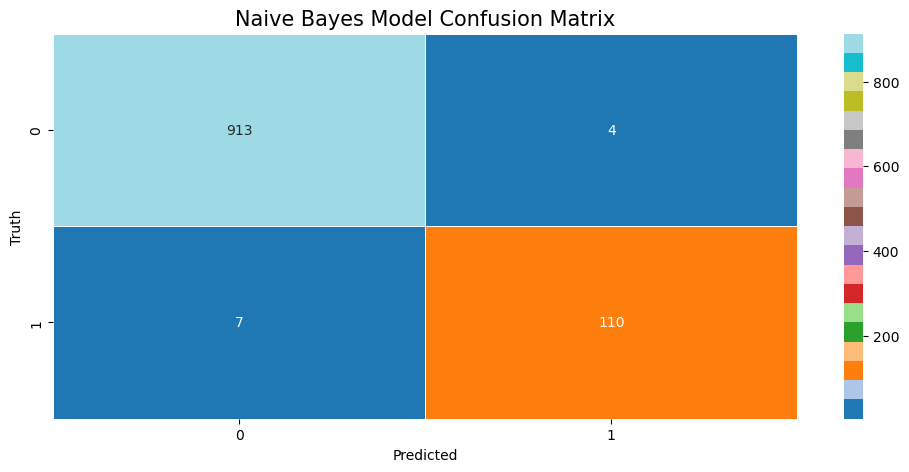

In [56]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(12,5))
sns.heatmap(cm, annot = True, linewidths = 0.5, cmap = 'tab20', fmt = 'd')
plt.title('Naive Bayes Model Confusion Matrix', size = 15)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [57]:
import pickle
pickle.dump(tf, open('vectorizer.pkl', 'wb'))
pickle.dump(clf, open('model.pkl', 'wb'))